# Read Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = np.loadtxt("E:\CP_Kronos1_Logs_depth.las", skiprows=41)

logs = ['DEPT', 'ADJS1', 'ADJS2', 'CALI', 'DTCO', 'DTCO_inp', 'DTSM', 'GR', 'NPHI', 'RHOB', 'RESD']
data = pd.DataFrame(data, columns=logs)
data [data==-999.2500]= np.nan
data

,DEPT,ADJS1,ADJS2,CALI,DTCO,DTCO_inp,DTSM,GR,NPHI,RHOB,RESD
0,0.0000,0.0000,0.0,NaN,201.1881,NaN,NaN,NaN,NaN,NaN,NaN
1,0.1524,0.0001,NaN,NaN,201.1881,NaN,NaN,NaN,NaN,NaN,NaN
2,0.3048,0.0002,NaN,NaN,201.1881,NaN,NaN,NaN,NaN,NaN,NaN
3,0.4572,0.0003,NaN,NaN,201.1881,NaN,NaN,NaN,NaN,NaN,NaN
4,0.6096,0.0004,NaN,NaN,201.1881,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
34713,5290.2612,NaN,NaN,5.80379,NaN,NaN,NaN,NaN,NaN,NaN,11.11034
34714,5290.4136,NaN,NaN,5.75505,NaN,NaN,NaN,NaN,NaN,NaN,12.82979
34715,5290.5660,NaN,NaN,5.70138,NaN,NaN,NaN,NaN,NaN,NaN,13.55044
34716,5290.7184,NaN,NaN,5.68294,NaN,NaN,NaN,NaN,NaN,NaN,13.76641


In [3]:
data = data[['DEPT', 'CALI', 'DTCO', 'GR', 'NPHI', 'RHOB', 'RESD', 'DTSM']]
data = data.dropna()
data.to_csv("Data.csv")
data

,DEPT,CALI,DTCO,GR,NPHI,RHOB,RESD,DTSM
31045,4731.2580,6.01999,79.96725,38.80238,0.25050,2.66556,2.43580,139.85977
31046,4731.4104,6.01880,80.34195,35.92152,0.24645,2.66857,2.49118,139.35838
31047,4731.5628,6.01880,80.00909,32.95725,0.24084,2.67534,2.74363,139.14355
31048,4731.7152,6.01880,79.30257,30.02623,0.23403,2.68653,3.22170,138.78993
31049,4731.8676,6.01880,78.37672,27.78731,0.22752,2.70163,3.86510,137.37775
...,...,...,...,...,...,...,...,...
34654,5281.2696,5.75321,57.95837,56.51004,0.06369,2.68242,11.67827,109.07732
34655,5281.4220,5.76422,57.95403,53.95823,0.05863,2.68117,16.36135,109.06725
34656,5281.5744,5.77458,57.94971,49.62489,0.05248,2.68051,22.39172,109.05711
34657,5281.7268,5.79369,57.94537,44.21585,0.04640,2.68005,27.36535,109.04709


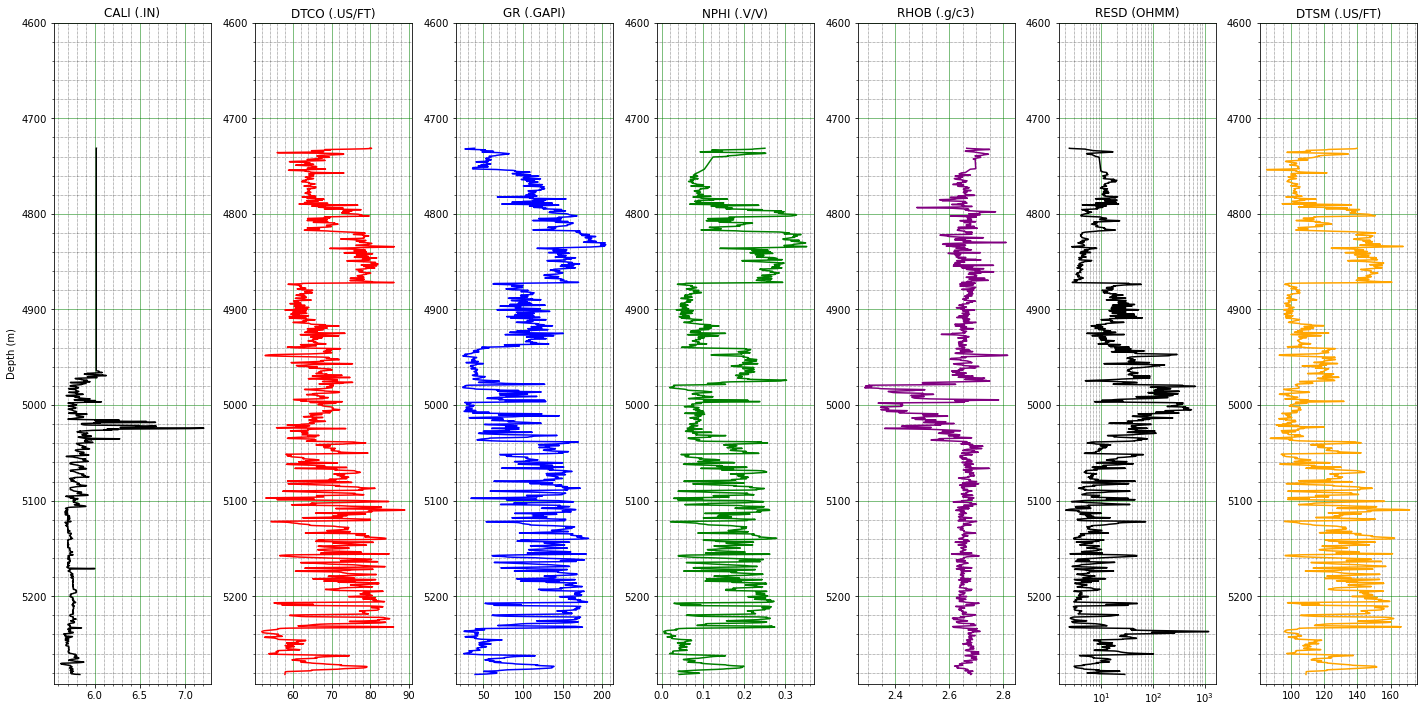

In [60]:
logs = ['CALI', 'DTCO', 'GR', 'NPHI', 'RHOB', 'RESD', 'DTSM']
fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))
colors = ['black', 'red', 'blue', 'green', 'purple', 'black', 'orange']
title = [' (.IN)', (' (.US/FT)'), (' (.GAPI)'), (' (.V/V)'), (' (.g/c3)'), (' (OHMM)'), (' (.US/FT)')]

for i in range(len(logs)):
    if i == 5:
        ax[i].semilogx(data[logs[i]], data['DEPT'], color=colors[i])
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='green')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    else:
    # for non-resistivity, normal plot
        ax[i].plot(data[logs[i]], data['DEPT'], color=colors[i])
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='green')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    
    ax[i].set_title(logs[i] + title[i])
    ax[i].grid(True)
    ax[i].set_ylim(max(data['DEPT']+10), 4600)
    ax[0].set_ylabel('Depth (m)')
plt.tight_layout(1.1)
plt.savefig('datalog.png', dpi=750)
plt.show()

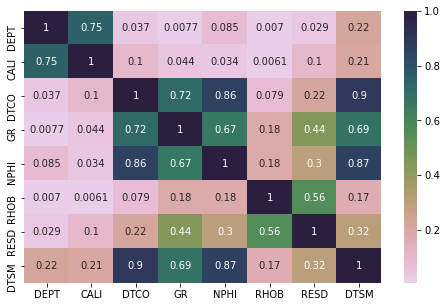

In [52]:
plt.figure(figsize=(8,5))

cmap = sns.cubehelix_palette(n_colors=12, start=-2.25, rot=-1.3, as_cmap=True)
sns.heatmap(abs(data.corr()), cmap=cmap, annot=True)
plt.savefig('corr.png', dpi=750)

# Make The Model 

In [6]:
#inisiasi data target dan predictor
X = data[['DTCO','NPHI','GR','RESD','DEPT']]
y = data[['DTSM']]
print(X.shape)
print(y.shape)

(3614, 5)
(3614, 1)


In [7]:
# Split Data Sumur Kronos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [8]:
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
#KNN has many parameters
regressor = KNeighborsRegressor(n_neighbors=4)

In [10]:
#Fit the regressor object to the dataset.
regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [11]:
y_pred = regressor.predict(X_test)
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)
DD = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
DD

,Actual,Predicted
0,163.93866,154.893518
1,137.20140,137.932735
2,98.55428,98.657885
3,135.79395,135.548095
4,110.80409,107.805785
...,...,...
1080,99.54908,110.401630
1081,126.60171,122.745440
1082,134.12915,135.753075
1083,97.74401,99.605333


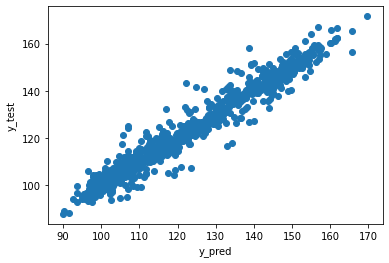

Mean Absolute Error: 2.340192470046083
Mean Squared Error: 13.596261249758504
Root Mean Squared Error: 3.687310842573284
r2Score :  0.9631536990743125
koefisien korelasi : 0.981586972103285


In [12]:
plt.scatter (y_pred,y_test)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2Score : ',r2_score(y_test, y_pred, sample_weight=None, multioutput='uniform_average'))
Corr=np.corrcoef(y_pred,y_test)
print('koefisien korelasi :', Corr[1,0])

## Hyperparamater Tuning 

In [13]:
from sklearn.model_selection import GridSearchCV

n_neighbors = np.arange(1, 31, 1)
algorithm = ['ball_tree', 'kd_tree']
clf = GridSearchCV(KNeighborsRegressor(), {
    'n_neighbors':n_neighbors}, cv=5, return_train_score=True)

best_model = clf.fit(X_train, y_train)
best_model

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             return_train_score=True)

In [14]:
clf.cv_results_

{'mean_fit_time': array([0.00438786, 0.00438828, 0.00498672, 0.00418906, 0.00477586,
        0.0047905 , 0.00438981, 0.00457544, 0.00478673, 0.00439458,
        0.00439124, 0.00440097, 0.00499988, 0.00399098, 0.00457916,
        0.00459223, 0.00438504, 0.0039897 , 0.00538883, 0.00539026,
        0.00478687, 0.00537992, 0.00478668, 0.00538521, 0.00518761,
        0.00459313, 0.00439401, 0.00458617, 0.00478907, 0.0042037 ]),
 'std_fit_time': array([4.88324624e-04, 4.89044836e-04, 1.09218828e-03, 3.98255108e-04,
        3.93909534e-04, 3.94204465e-04, 4.98385544e-04, 4.94160830e-04,
        4.20568562e-04, 4.72594036e-04, 4.87362740e-04, 5.04913768e-04,
        1.72921693e-05, 3.00672203e-06, 4.82691296e-04, 5.03521286e-04,
        4.87617870e-04, 6.32410843e-04, 1.02627036e-03, 4.94337765e-04,
        7.46200085e-04, 1.49776838e-03, 7.46085304e-04, 4.88188514e-04,
        4.02046165e-04, 4.82263847e-04, 4.84280767e-04, 4.81834862e-04,
        7.37631087e-04, 3.91210921e-04]),
 'mean_scor

In [15]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004388,0.000488,0.004189,3.989459e-04,1,{'n_neighbors': 1},0.930690,0.932656,0.935903,0.950917,...,0.939346,0.007969,30,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.004388,0.000489,0.004188,3.989221e-04,2,{'n_neighbors': 2},0.947260,0.950439,0.941605,0.955382,...,0.950598,0.005905,7,0.985281,0.984963,0.984721,0.983426,0.984820,0.984642,0.000637
2,0.004987,0.001092,0.004794,3.885350e-04,3,{'n_neighbors': 3},0.946887,0.953814,0.942527,0.958194,...,0.952605,0.007042,3,0.978497,0.977974,0.978166,0.977016,0.977208,0.977772,0.000568
3,0.004189,0.000398,0.004982,8.807171e-06,4,{'n_neighbors': 4},0.944081,0.956238,0.944949,0.959418,...,0.952883,0.006946,2,0.974458,0.973495,0.972696,0.971492,0.973041,0.973036,0.000973
4,0.004776,0.000394,0.005400,4.777382e-04,5,{'n_neighbors': 5},0.945938,0.957392,0.945458,0.959261,...,0.953204,0.006160,1,0.970758,0.970438,0.970452,0.968690,0.969462,0.969960,0.000771
5,0.004790,0.000394,0.005582,4.861289e-04,6,{'n_neighbors': 6},0.945086,0.956614,0.943106,0.958704,...,0.952122,0.006620,4,0.968617,0.967431,0.967602,0.965690,0.966452,0.967158,0.001005
6,0.004390,0.000498,0.005395,5.001941e-04,7,{'n_neighbors': 7},0.943243,0.955413,0.944761,0.957894,...,0.951360,0.006093,5,0.966352,0.965278,0.965256,0.963654,0.964411,0.964990,0.000909
7,0.004575,0.000494,0.006187,4.157654e-04,8,{'n_neighbors': 8},0.944246,0.954611,0.943940,0.955217,...,0.950790,0.005484,6,0.964404,0.963561,0.963742,0.961524,0.962289,0.963104,0.001046
8,0.004787,0.000421,0.006379,4.688019e-04,9,{'n_neighbors': 9},0.943604,0.953769,0.944273,0.954399,...,0.950591,0.005536,8,0.963054,0.962045,0.962777,0.959937,0.960657,0.961694,0.001209
9,0.004395,0.000473,0.005979,2.738557e-05,10,{'n_neighbors': 10},0.944376,0.952779,0.943414,0.953755,...,0.950198,0.005311,9,0.961847,0.959985,0.962114,0.958595,0.959159,0.960340,0.001413


In [16]:
results = df[['param_n_neighbors', 'mean_test_score', 'mean_train_score', 'rank_test_score']]
results.to_csv("tuning_KNN.csv")
results

,param_n_neighbors,mean_test_score,mean_train_score,rank_test_score
0,1,0.939346,1.000000,30
1,2,0.950598,0.984642,7
2,3,0.952605,0.977772,3
3,4,0.952883,0.973036,2
4,5,0.953204,0.969960,1
5,6,0.952122,0.967158,4
6,7,0.951360,0.964990,5
7,8,0.950790,0.963104,6
8,9,0.950591,0.961694,8
9,10,0.950198,0.960340,9


In [17]:
print('best score:', clf.best_score_)
print('\nbest parameter:', clf.best_params_)

best score: 0.9532036127320854

best parameter: {'n_neighbors': 5}


In [18]:
nbors = results["param_n_neighbors"].values
trn_score = results["mean_train_score"].values
tst_score = results["mean_test_score"].values

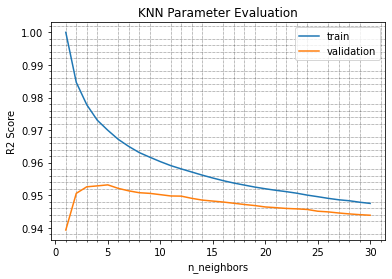

1.0


In [19]:
plt.plot(nbors, trn_score, label='train')
plt.plot(nbors, tst_score, label='validation')
plt.title('KNN Parameter Evaluation')
plt.xlabel("n_neighbors")
plt.ylabel("R2 Score")
plt.minorticks_on()
plt.grid(which='major', linestyle=':', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.grid()
plt.legend()
plt.savefig("performance plot KNN.png", dpi=500)
plt.show()
print(trn_score[0])

### Train Prediction 

In [20]:
ypredtrain = best_model.predict(X_train)

Mean Absolute Error: 1.922728845393436
Mean Squared Error: 9.824984980659831
Root Mean Squared Error: 3.1344832079084157
r2 Score : 0.9716564962335316


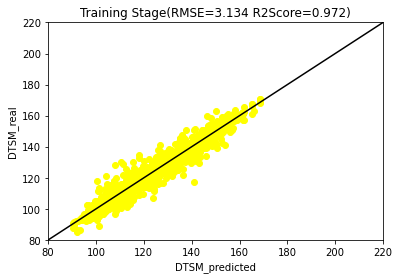

In [21]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_train, ypredtrain)
MSE = metrics.mean_squared_error(y_train, ypredtrain)
RMSE = np.sqrt(metrics.mean_squared_error(y_train, ypredtrain))
r2score = r2_score(y_train, ypredtrain, sample_weight=None, multioutput='uniform_average')

print('Mean Absolute Error:', MAE)
print('Mean Squared Error:', MSE)
print('Root Mean Squared Error:', RMSE)
print('r2 Score :', r2score)

t1 = np.str(np.round(RMSE, 3))
t2 = np.str(np.round(r2score, 3))

u = np.arange(80,220,0.01)
i = u
plt.plot(u,i,color='black')
plt.xlim(80,220)
plt.ylim(80,220)
plt.title("Training Stage(RMSE=" + t1 + " R2Score=" + t2 + ")")
plt.scatter (ypredtrain,y_train,color='yellow' )
plt.xlabel("DTSM_predicted")
plt.ylabel("DTSM_real")
# plt.savefig("Train Stage KNN.png", dpi=500)
plt.show()

### Test Prediction  

In [22]:
ypredtest = best_model.predict(X_test)

Mean Absolute Error: 2.4076107631336403
Mean Squared Error: 13.985222598091813
Root Mean Squared Error: 3.7396821520139665
r2 Score : 0.9620996014348305


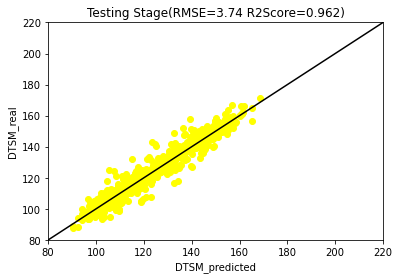

In [23]:
MAE = metrics.mean_absolute_error(y_test, ypredtest)
MSE = metrics.mean_squared_error(y_test, ypredtest)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, ypredtest))
r2score = r2_score(y_test, ypredtest, sample_weight=None, multioutput='uniform_average')

print('Mean Absolute Error:', MAE)
print('Mean Squared Error:', MSE)
print('Root Mean Squared Error:', RMSE)
print('r2 Score :', r2score)

t1 = np.str(np.round(RMSE, 3))
t2 = np.str(np.round(r2score, 3))

plt.plot(u,i,color='black')
plt.xlim(80,220)
plt.ylim(80,220)
plt.scatter (ypredtest, y_test, color='yellow' )
plt.title("Testing Stage(RMSE=" + t1 + " R2Score=" + t2 + ")")
plt.xlabel("DTSM_predicted")
plt.ylabel("DTSM_real")
# plt.savefig("Test Stage KNN.png", dpi=500)
plt.show()

### Use the model to predict all data 

In [24]:
X = scaler.transform(X)
DTSM_predict_final = best_model.predict(X)

In [25]:
y = np.ravel(y)
DTSM_predict_final = np.ravel(DTSM_predict_final)
df = pd.DataFrame({'Actual':y, 'Predicted':DTSM_predict_final})
# print(y.values)
print(df)

         Actual   Predicted
0     139.85977  137.806950
1     139.35838  137.806950
2     139.14355  137.806950
3     138.78993  137.806950
4     137.37775  137.806950
...         ...         ...
3609  109.07732  109.147804
3610  109.06725  109.155854
3611  109.05711  108.856812
3612  109.04709  108.460240
3613  109.03704  109.039744

[3614 rows x 2 columns]


In [26]:
df.to_csv("Hasil_KNN_AllData.csv")

Mean Absolute Error: 2.068300754842279
Mean Squared Error: 11.0739771817981
Root Mean Squared Error: 3.32775858225895
r2 Score :  0.9676976916003367
koefisien korelasi : 0.9842140402191808


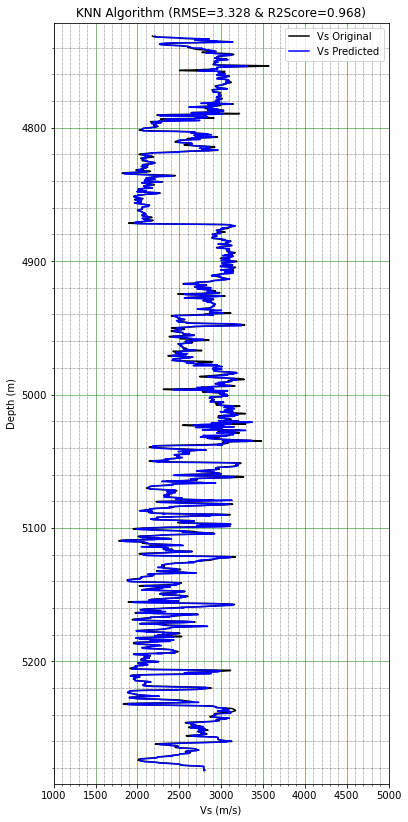

VS_max = 3373.1619504410346
Vs_min = 1810.2578474737081


In [27]:
MAE = metrics.mean_absolute_error(DTSM_predict_final, y)
MSE = metrics.mean_squared_error(DTSM_predict_final, y)
RMSE = np.sqrt(metrics.mean_squared_error(DTSM_predict_final,y))
r2score = r2_score(DTSM_predict_final,y, sample_weight=None, multioutput='uniform_average')
Corr=np.corrcoef(DTSM_predict_final, y)

print('Mean Absolute Error:', MAE)
print('Mean Squared Error:', MSE)
print('Root Mean Squared Error:', RMSE)
print('r2 Score : ', r2score)
print('koefisien korelasi :', Corr[1,0])

t1 = np.str(np.round(RMSE, 3))
t2 = np.str(np.round(r2score, 3))

vs_ori  = 1/y                   # ft/us
vs_pred = 1/DTSM_predict_final  # ft/us
vs_ori  = vs_ori* 10**6 *0.3048 # m/s
vs_pred = vs_pred* 10**6 *0.3048 # m/s

plt.figure(figsize=(6,14))
plt.plot(vs_ori, data['DEPT'], 'k', label='Vs Original')
plt.plot(vs_pred, data['DEPT'], 'b', label='Vs Predicted')
plt.title("KNN Algorithm (RMSE=" + t1 + " & R2Score=" + t2 + ")")
plt.ylabel("Depth (m)")
plt.xlabel("Vs (m/s)")
plt.xlim(1000, 5000)
plt.ylim((np.min(data["DEPT"]))-10, (np.max(data["DEPT"]))+10)
plt.gca().invert_yaxis()
plt.legend()
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig("HasilKNN_to_alldepth.png", dpi=500)
plt.show()
print("VS_max =",np.max(vs_pred))
print("Vs_min =",np.min(vs_pred))

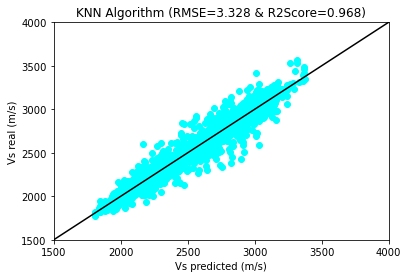

In [28]:
u = np.arange(1500, 4000,0.01)
i = u

plt.scatter (vs_pred, vs_ori, color='cyan')
plt.plot(u, i, color='black')
plt.xlim(1500, 4000)
plt.ylim(1500, 4000)
plt.xlabel("Vs predicted (m/s)")
plt.ylabel("Vs real (m/s)")
plt.title("KNN Algorithm (RMSE=" + t1 + " & R2Score=" + t2 + ")")
plt.savefig("Predict Final KNN.png", dpi=500)
plt.show()

# Predict Vs at Poseidon-2

In [29]:
filename2 = "E:\poseidon2.csv"
data2all = np.loadtxt(filename2, skiprows=1,delimiter=',')
mneumonics =  ['DEPT','GR','RESD','DTCO_adj','DTSM','RHOB','NPHI']
data2all = pd.DataFrame(data2all, columns=mneumonics)
data2all[data2all==-999.2500]= np.nan
data2=data2all.dropna()
# data2.head()
data2

,DEPT,GR,RESD,DTCO_adj,DTSM,RHOB,NPHI
8432,4706.0,87.1060,5.2738,63.5098,125.8618,2.7045,18.5850
8433,4706.5,114.0807,14.5054,53.4385,94.4603,2.6881,19.8786
8434,4707.0,132.6039,42.6378,56.3126,104.6554,2.5873,9.4619
8435,4707.5,76.1229,27.6133,60.5667,112.1985,2.5631,7.1419
8436,4708.0,81.0515,9.4066,70.8030,120.3025,2.5848,17.3160
...,...,...,...,...,...,...,...
9610,5295.0,101.7518,93.6949,54.7466,102.9919,2.5844,6.1230
9611,5295.5,106.8450,62.2725,57.1979,97.8452,2.6017,5.3946
9612,5296.0,87.8176,45.4477,58.4825,95.9389,2.6305,5.7106
9613,5296.5,121.3806,49.6154,62.2483,119.2572,2.6382,5.4973


In [30]:
X2 = data2[['DTCO_adj','NPHI','GR','RESD','DEPT']].values
y2 = data2[['DTSM']].values
print(X2.shape)
print(y2.shape)

(1183, 5)
(1183, 1)


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X2= scaler.fit_transform(X2)

In [32]:
ypredpos2 = best_model.predict(X2)

Mean Absolute Error: 11.096297232459847
Mean Squared Error: 215.38066871189324
Root Mean Squared Error: 14.675853253282865
r2 Score :  0.6341213765208707


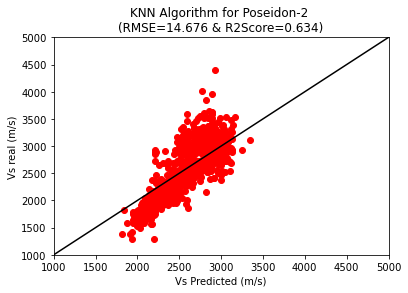

In [33]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

MAE = metrics.mean_absolute_error(y2, ypredpos2)
MSE = metrics.mean_squared_error(y2, ypredpos2)
RMSE = np.sqrt(metrics.mean_squared_error(y2, ypredpos2))
r2score = r2_score(y2, ypredpos2, sample_weight=None, multioutput='uniform_average')

print('Mean Absolute Error:', MAE)
print('Mean Squared Error:', MSE)
print('Root Mean Squared Error:', RMSE)
print('r2 Score : ', r2score)

t1 = np.str(np.round(RMSE, 3))
t2 = np.str(np.round(r2score, 3))

vs_ori  = 1/y2                      # ft/us
vs_pred = 1/ypredpos2              # ft/us
vs_ori_pos  = vs_ori* 10**6 *0.3048    # m/s
vs_pred_pos = vs_pred* 10**6 *0.3048   # m/s

plt.scatter (vs_pred_pos, vs_ori_pos, color='red')
s = np.arange(1000, 5000,0.01)
t = s
plt.plot(s,t,color='black')
plt.xlim(1000, 5000)
plt.ylim(1000, 5000)
plt.xlabel("Vs Predicted (m/s)")
plt.ylabel("Vs real (m/s)")
plt.title("KNN Algorithm for Poseidon-2 \n(RMSE=" + t1 + " & R2Score=" + t2 + ")")
plt.savefig("Predict POS2 KNN.png", dpi=500)
plt.show()

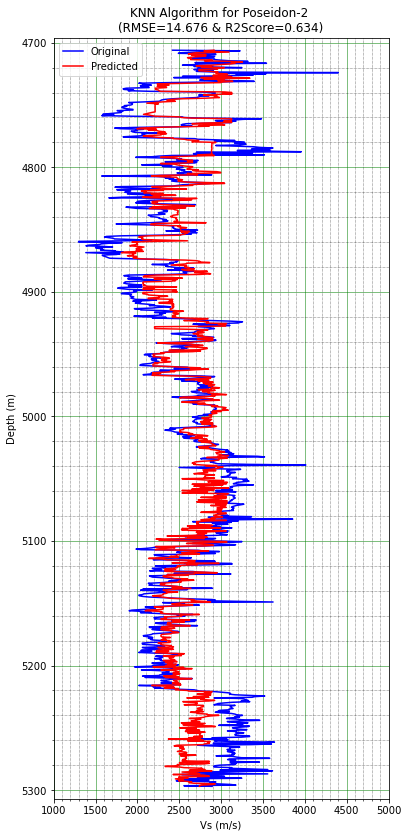

Vs_max = 3344.191862870228
Vs_min = 1810.2578474737081


In [34]:
plt.figure(figsize=(6,14))
plt.plot(vs_ori_pos, data2['DEPT'],label='Original',color='blue')
plt.plot(vs_pred_pos, data2['DEPT'],label='Predicted',color='red')
plt.title("KNN Algorithm for Poseidon-2 \n(RMSE=" + t1 + " & R2Score=" + t2 + ")")
plt.ylabel("Depth (m)")
plt.xlabel("Vs (m/s)")
plt.xlim(1000, 5000)
plt.ylim((np.min(data2["DEPT"]))-10,(np.max(data2["DEPT"]))+10)
plt.gca().invert_yaxis()
plt.legend()
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig("HasilKNN_poseidon2.png", dpi=500)
plt.show()
print("Vs_max =",np.max(vs_pred_pos))
print("Vs_min =",np.min(vs_pred_pos))